In [1]:
import sys
sys.path.append('../')
sys.path.append('../rlkit_master/')

import pickle
from rlkit_master.rlkit.samplers.rollout_functions import rollout
# from rlkit_master.rlkit.envs.wrappers import NormalizedBoxEnv
import torch
import seaborn as sns
# from gym.envs.mujoco import HalfCheetahEnv

from bokeh.plotting import figure, show, output_file
from bokeh.plotting import output_notebook
fиrom bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.client import push_session, pull_session

from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider,TextInput
from bokeh.plotting import figure, show, ColumnDataSource

output_notebook()

import matplotlib.pyplot as plt
# import seaborn as sns

from scipy.fftpack import fft, fftfreq, fftshift
from skimage import util
import numpy as np
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
import mujoco_py

In [ ]:
import gym.envs.mujoco

In [6]:
envs.mujoco

AttributeError: module 'gym.envs' has no attribute 'mujoco'

In [ ]:
from gym.envs.mujoco import HalfCheetahEnv

In [ ]:
# pip install seaborn

In [ ]:
eval_env = NormalizedBoxEnv(HalfCheetahEnv())

In [ ]:
# with open('../rlkit_master/data/name-of-experiment/name-of-experiment_2019_11_21_15_29_55_0000--s-0/itr_0.pkl', 'rb') as f:
#     agent = pickle.load(f)

In [ ]:
agent = torch.load('../rlkit_master/data/name-of-experiment/name-of-experiment_2019_11_22_14_30_29_0000--s-0/itr_1000.pkl')

In [ ]:
agent = agent['trainer/policy']

In [98]:
rollout_dict = rollout(
        env = eval_env ,
        agent = agent,
        max_path_length=1000,
        render=False,
        render_kwargs=None,
)

In [99]:
act_num = 4

In [100]:
rollout_dict['actions'][:,act_num].shape

(1000,)

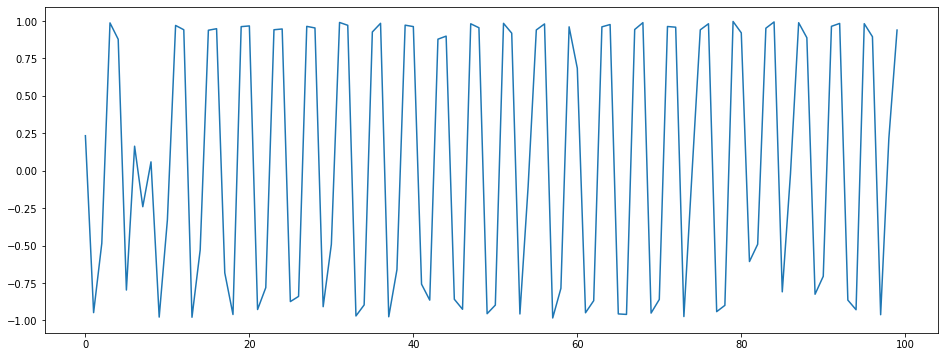

In [101]:
plt.figure(figsize=(16, 6))
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,0][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,1][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,2][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,3][:100])
ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,4][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,5][:100])

plt.show()

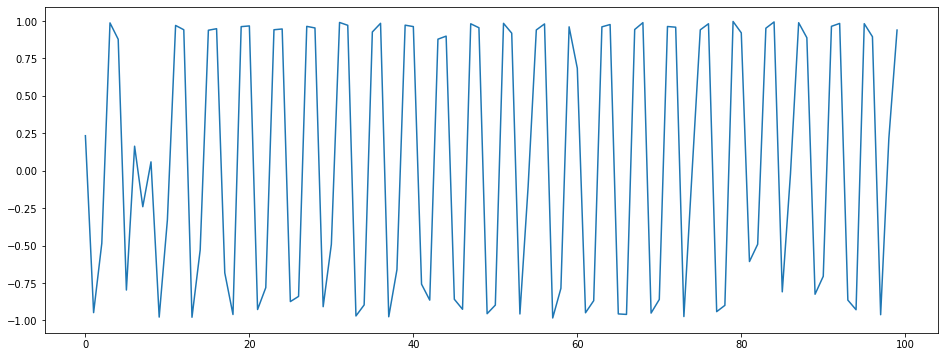

In [102]:
plt.figure(figsize=(16, 6))
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,0][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,1][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,2][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,3][:100])
ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,4][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,5][:100])

plt.show()

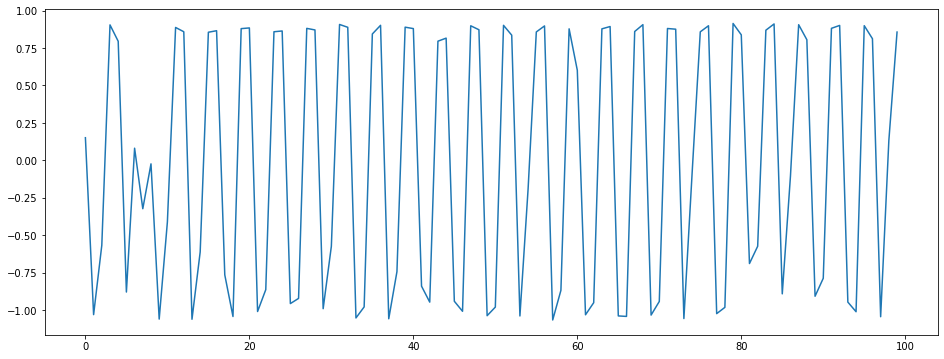

In [129]:
plt.figure(figsize=(16, 6))
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,0][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,1][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,2][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,3][:100])
ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,4][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,5][:100])

plt.show()

In [156]:
M = int(10*8)
slices = util.view_as_windows(rollout_dict['actions'][:,act_num], window_shape=(M,), step=6)
# remove DC
# slices -= np.mean(slices)
slices.shape

(154, 80)

In [157]:
win = np.hanning(M + 1)[:-1]
# Window signal
# slices *= scipy.signal.windows.hann(len(slices))
slices = slices * win

In [158]:
spectrum = np.fft.rfft(slices.T, axis=0,norm = 'ortho')
# [:M // 2 + 1:-1]
spectrum = np.abs(spectrum)
spectrum.shape

(41, 154)

In [159]:
y = spectrum.mean(axis = 1)

# remove DC
# y -= np.mean(y)

<Figure size 432x288 with 0 Axes>

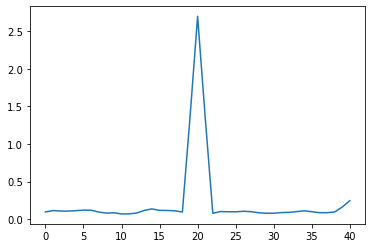

<Figure size 432x288 with 0 Axes>

In [160]:
fft = np.fft.rfft(spectrum, norm="ortho")


plt.plot(spectrum.mean(axis =1))
plt.figure()

In [139]:
# scaler = MinMaxScaler()
# y = scaler.fit_transform(y.reshape(-1, 1))

In [140]:
y

array([0.11410745, 0.10781489, 0.10718888, 0.11275513, 0.12048151,
       0.11913766, 0.09522264, 0.08030552, 0.08499065, 0.06967489,
       0.07014821, 0.08127104, 0.11679078, 0.13606108, 0.11705263,
       0.11565168, 0.11131947, 0.095092  , 1.35175403, 2.70103417,
       1.3531451 , 0.07813004, 0.10093215, 0.09846114, 0.09752808,
       0.10450648, 0.09991776, 0.08568073, 0.07838578, 0.07861697,
       0.08750079, 0.09004712, 0.10032306, 0.11085947, 0.09917565,
       0.08637885, 0.08593826, 0.09466723])

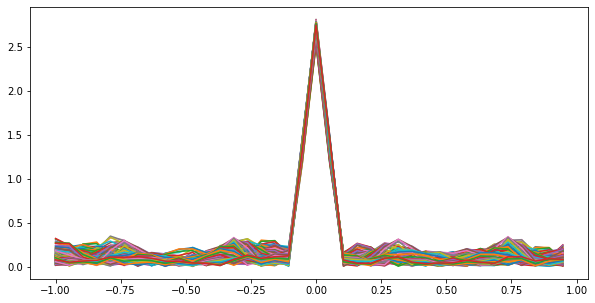

In [143]:
spectrum_shift = np.fft.fftshift(np.abs(y))
fig,ax = plt.subplots(1,1,figsize=(10,5))
# ax[0].plot(xf,light_intensity())
x1 = -1
x2 = 1
xf = np.arange(x1,x2,1/19)
ax.plot(xf,spectrum)
# ax.set_xlim(-0.05,0.05)
plt.show()

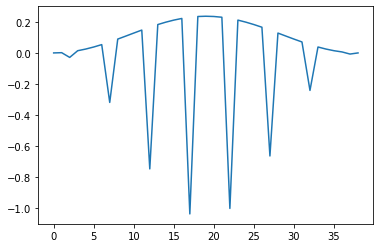

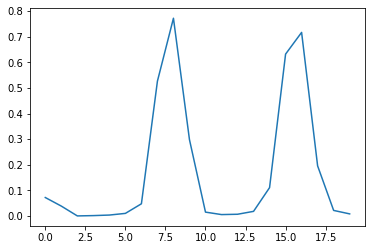

In [118]:
import numpy as np
import scipy.signal

from matplotlib import pyplot as plt

L = np.array([2.762, 2.762, 1.508, 2.758, 2.765, 2.765, 2.761, 1.507, 2.757, 2.757, 2.764, 2.764, 1.512, 2.76, 2.766, 2.766, 2.763, 1.51, 2.759, 2.759, 2.765, 2.765, 1.514, 2.761, 2.758, 2.758, 2.764, 1.513, 2.76, 2.76, 2.757, 2.757, 1.508, 2.763, 2.759, 2.759, 2.766, 1.517, 4.012])
L = np.round(L, 1)
# Remove DC component
L -= np.mean(L)
# Window signal
L *= scipy.signal.windows.hann(len(L))

fft = np.fft.rfft(L, norm="ortho")

plt.plot(L)
plt.figure()
plt.plot(abs(fft))

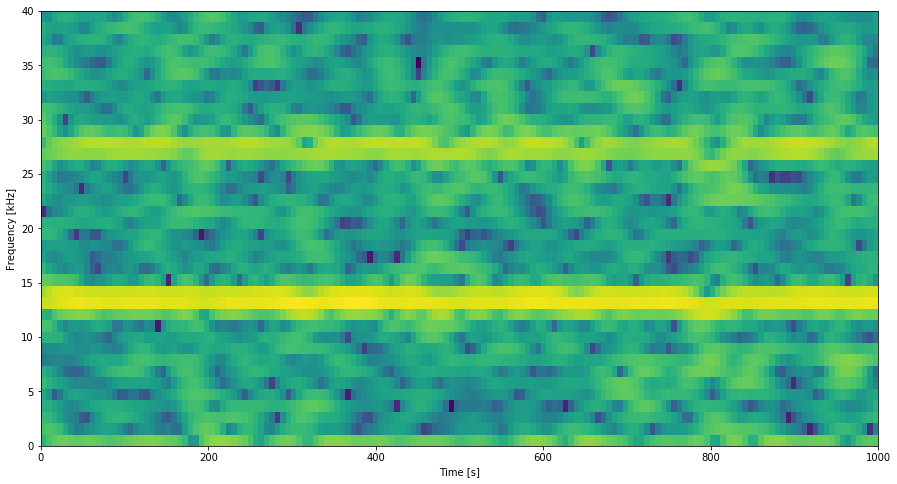

In [118]:
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

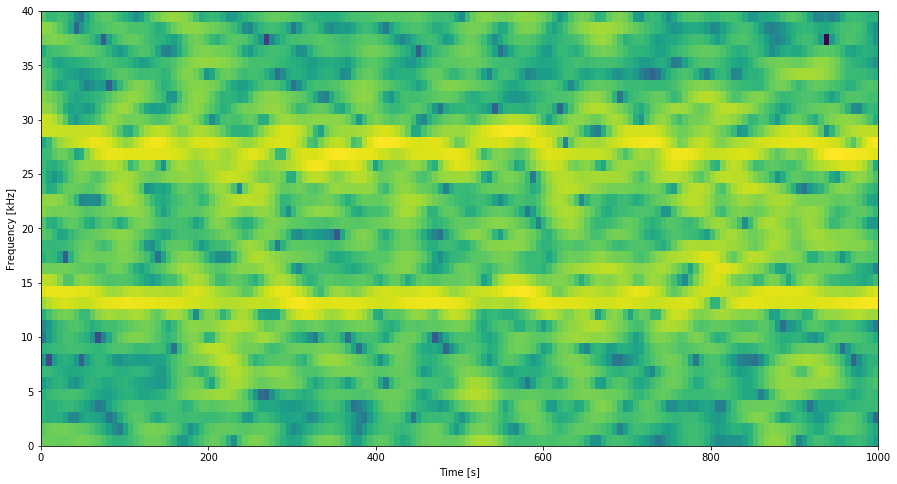

In [91]:
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

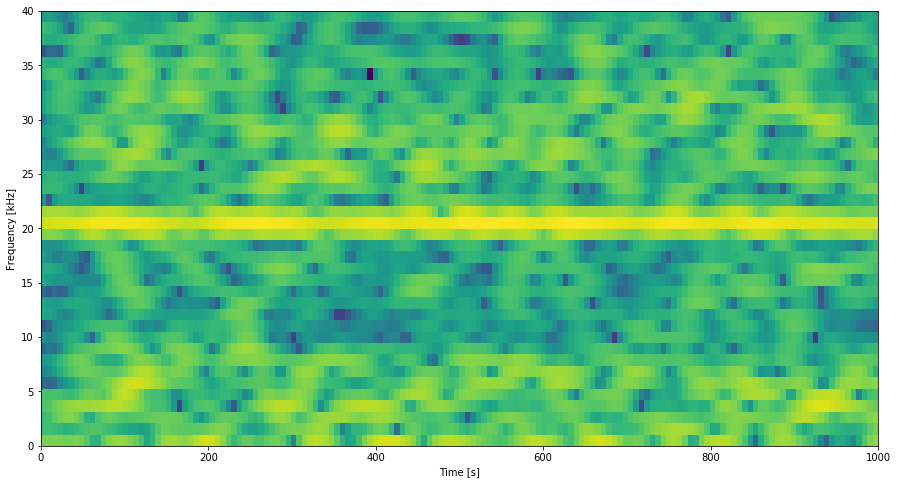

In [82]:
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

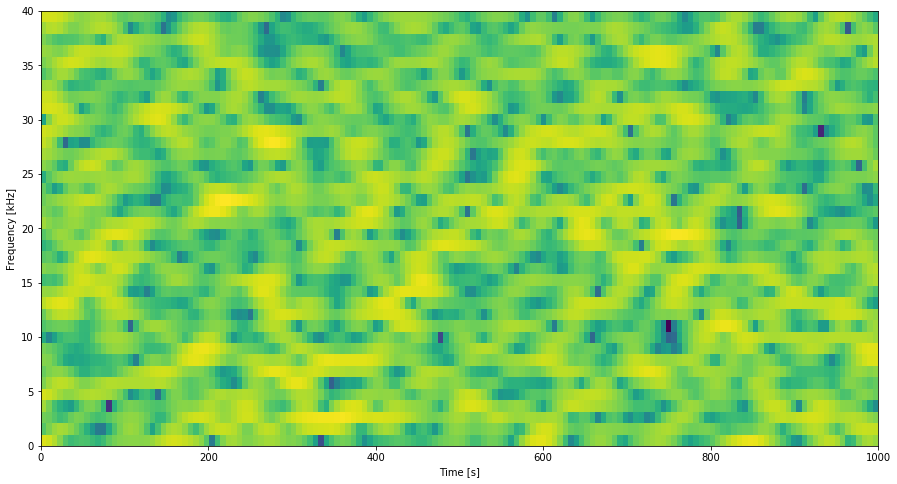

In [73]:
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

1400


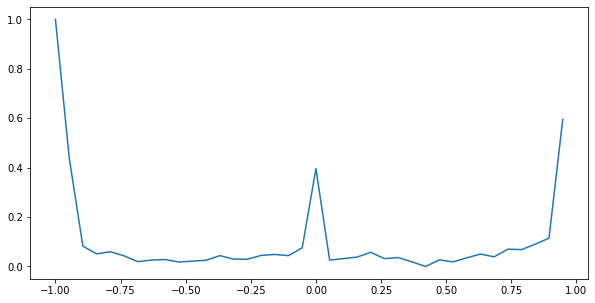

1410


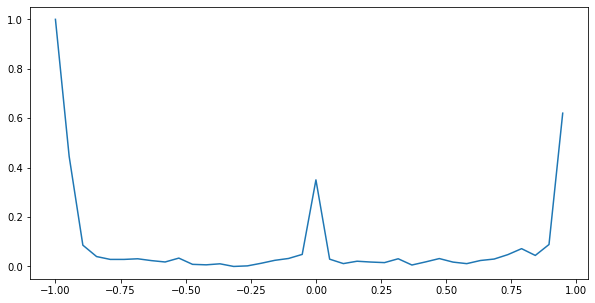

1420


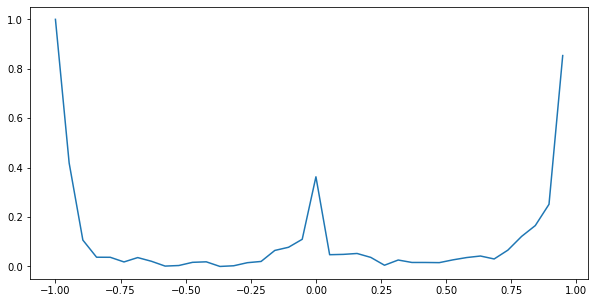

1430


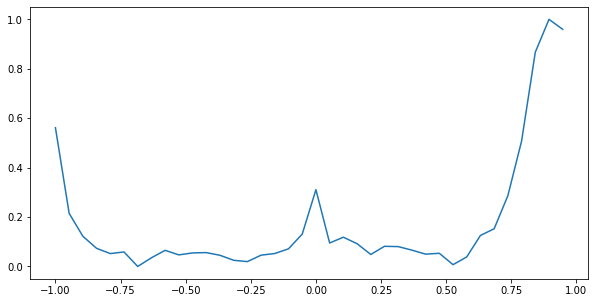

1440


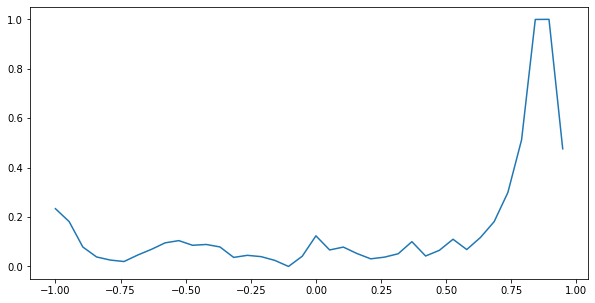

1450


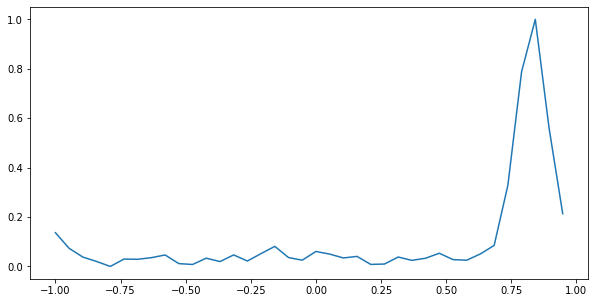

1460


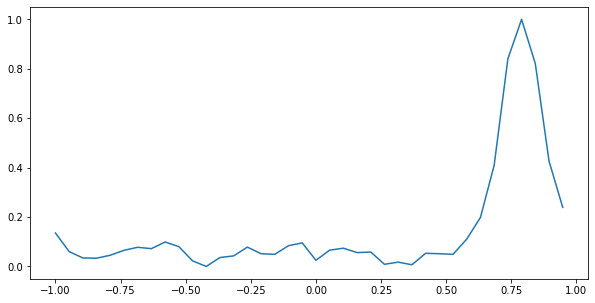

1470


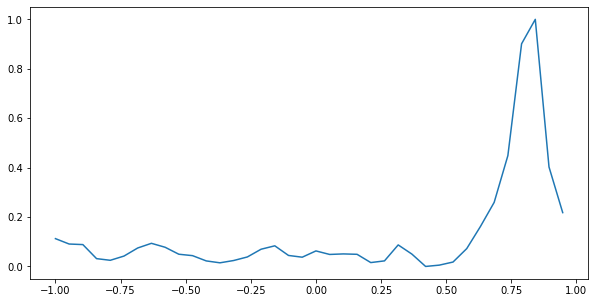

1480


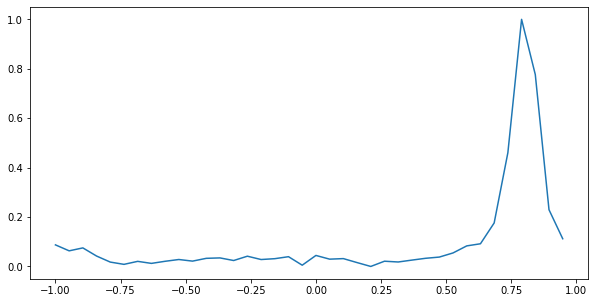

1490


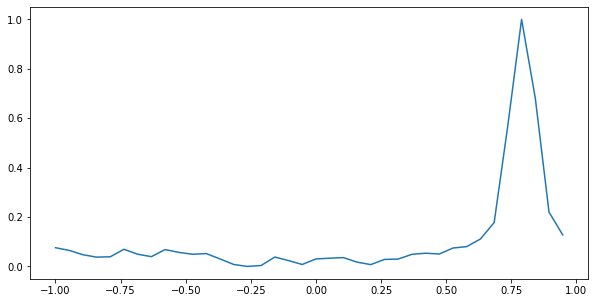

In [32]:

act_num = 5
for i in range(1400,1500):
    if np.mod(i,10) == 0:
        print(i)
        agent = torch.load(f'../rlkit_master/data/name-of-experiment/name-of-experiment_2019_11_22_14_30_29_0000--s-0/itr_{i}.pkl')
        agent = agent['trainer/policy']
        
        rollout_dict = rollout(
        env = eval_env ,
        agent = agent,
        max_path_length=1000,
        render=False,
        render_kwargs=None,
            )
        
        M = int(10*8)
        slices = util.view_as_windows(rollout_dict['actions'][:,act_num], window_shape=(M,), step=6)
        
        win = np.hanning(M + 1)[:-1]
        slices = slices * win
        
        spectrum = np.fft.rfft(slices.T, axis=0)
        spectrum = np.abs(spectrum)
        
        y = spectrum.mean(axis = 1)
        
        scaler = MinMaxScaler()
        y = scaler.fit_transform(y.reshape(-1, 1))
        
        
        
        spectrum_shift = np.fft.fftshift(np.abs(y))
        fig,ax = plt.subplots(1,1,figsize=(10,5))
        # ax[0].plot(xf,light_intensity())
        x1 = -1
        x2 = 1
        xf = np.arange(x1,x2,1/19)
        ax.plot(xf,spectrum_shift)
        # ax.set_xlim(-0.05,0.05)
        plt.show()
        

In [178]:
def get_action_from_epoch(act_num,epoch_num):
    agent = torch.load(f'../rlkit_master/data/name-of-experiment/name-of-experiment_2019_11_22_14_30_29_0000--s-0/itr_{epoch_num}.pkl')
    agent = agent['trainer/policy']

    rollout_dict = rollout(
    env = eval_env ,
    agent = agent,
    max_path_length=1000,
    render=False,
    render_kwargs=None,
        )

    M = int(10*8)
    slices = util.view_as_windows(rollout_dict['actions'][:,act_num], window_shape=(M,), step=6)
    # remove DC
    slices -= np.mean(slices)
    
    win = np.hanning(M + 1)[:-1]
    slices = slices * win

    spectrum = np.fft.rfft(slices.T, axis=0, norm="ortho")
#     print(np.abs(spectrum).mean(axis = 1))
#     print(spectrum.mean(axis = 1))
#     spectrum = np.abs(spectrum)


#     spectrum_shift = np.fft.fftshift(np.abs(y))
#     print(spectrum_shift)
    return (np.abs(spectrum).mean(axis = 1))

In [181]:



act_num = 5
x1 = 0
x2 = 41
x = np.arange(x1,x2)

# x = np.linspace(0, 10, 500)

y_dict ={}
for act in range(6):
    for epoch in range(0,2991,10):
        y_dict[f'{act}_{epoch}'] = get_action_from_epoch(act,epoch)
y_dict["y"] = y_dict['0_0']

y_dict['x'] = x

source = ColumnDataSource(data= y_dict)

plot = figure(y_range=(-0.1, 3), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

epoch_slider = Slider(start=0, end=2991, value=0, step=10, title="Epoch")
act_num_slider = Slider(start=0, end=5, value=1, step=1, title="Act_num")
# phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
# offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, epoch=epoch_slider,act_num = act_num_slider),
                    code="""
    const data = source.data;
    const A = act_num.value;
    const E = epoch.value;
    const x = data['x'];
    const y = data[A.toString().concat('_',E.toString())];
    data['y'] = y;
    
    
    source.change.emit();
""")

epoch_slider.js_on_change('value', callback)
act_num_slider.js_on_change('value', callback)
# phase_slider.js_on_change('value', callback)
# offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(epoch_slider, act_num_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)

In [214]:
from statsmodels.graphics.tsaplots import plot_acf

In [317]:
epoch_num = 1040#560  2530
act_num = 2#2

agent = torch.load(f'../rlkit_master/data/name-of-experiment/name-of-experiment_2019_11_22_14_30_29_0000--s-0/itr_{epoch_num}.pkl')
agent = agent['trainer/policy']

rollout_dict = rollout(
env = eval_env ,
agent = agent,
max_path_length=1000,
render=False,
render_kwargs=None,
    )

period = np.argmax(y_dict[f'{act_num}_{epoch_num}'])
actions = rollout_dict['actions'][:,act_num]
period

20

In [318]:
# 13/(2*np.pi)

Using matplotlib backend: MacOSX


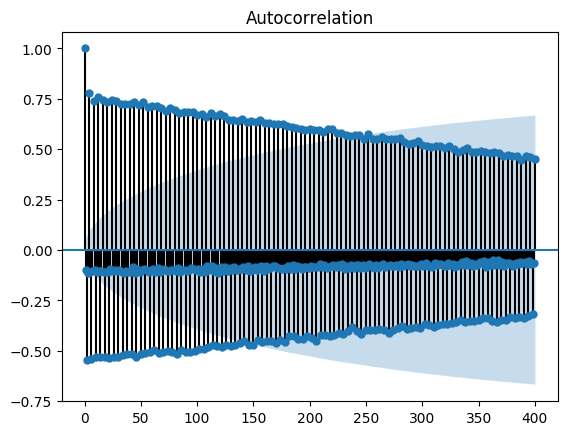

In [321]:
%matplotlib
# plt.xlim = (50,200)

plot_acf(actions,lags=400)


In [323]:
shift = 6
plt.figure(figsize=(16, 6))
plt.plot(actions[50:150])
# plt.plot(actions[13550+13])
plt.plot(actions[50+shift:150+shift])
plt.show()

In [257]:
min_rmse = 10
for period in range(1,50):
    rmse = sqrt(mean_squared_error(actions[:-period], actions[period:]))
    print('period =', period )
    print(rmse)
    if rmse < min_rmse:
        min_rmse = rmse
        min_period = period
        
min_period, min_rmse

period = 1
1.0255677860348587
period = 2
1.1756766643457797
period = 3
1.3909397411992588
period = 4
1.1855969991881508
period = 5
1.0200111750383247
period = 6
0.6885187230829876
period = 7
0.9964406026679328
period = 8
1.1839991715531415
period = 9
1.3360124087385588
period = 10
1.2021166055835848
period = 11
1.0457480898663436
period = 12
0.7370315551110211
period = 13
0.9692925195387808
period = 14
1.155623549795195
period = 15
1.3075551936387317
period = 16
1.2166858212169458
period = 17
1.0613599719793159
period = 18
0.8487528374783218
period = 19
0.9721580363081888
period = 20
1.1529669159661255
period = 21
1.2744619075519537
period = 22
1.2241582450204809
period = 23
1.0764507064022504
period = 24
0.8942836102191473
period = 25
0.9586485606894674
period = 26
1.1227385786074846
period = 27
1.2557908390975303
period = 28
1.2108757741639533
period = 29
1.0930916575978866
period = 30
0.9204850791165273
period = 31
0.9635976551732045
period = 32
1.1150281618607458
period = 33
1.2400

(6, 0.6885187230829876)

In [183]:
# for act in range(6):
#     for epoch in range(0,2991,10):
#         y_dict[f'{act}_{epoch}'] = get_action_from_epoch(act,epoch)
max_pick = {}
for act in range(6):
    act_period_max = []
    for epoch in range(0,2991,10):
        act_period_max.append(np.max( y_dict[f'{act}_{epoch}']))
    
    max_pick[f'{act}'] = act_period_max

max_pick["y"] = max_pick['0']

max_pick['x'] = [i for i  in range(0,2991,10)]

source = ColumnDataSource(data= max_pick)

plot = figure(y_range=(-0.1, 3), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

# epoch_slider = Slider(start=0, end=2991, value=0, step=10, title="Epoch")
act_num_slider = Slider(start=0, end=5, value=1, step=1, title="Act_num")
# phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
# offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source,act_num = act_num_slider),
                    code="""
    const data = source.data;
    const A = act_num.value;
    const x = data['x'];
    const y = data[A.toString()];
    data['y'] = y;
    
    
    source.change.emit();
""")

# epoch_slider.js_on_change('value', callback)
act_num_slider.js_on_change('value', callback)
# phase_slider.js_on_change('value', callback)
# offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column( act_num_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)
    

In [16]:
import numpy as np

from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = 2;
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)


In [2]:
from bokeh.models import Button
points = 100*np.random.rand(3,100)
points_x = points[0].tolist()
points_y = points[1].tolist()
p = figure(x_range=(0,100), y_range=(0,100))

circle_p = p.circle(x = points_x,
                    y = points_y, 
                    size = 20,
                    color = "navy", 
                    alpha = 0.5)

ds = circle_p.data_source

#callback function to update circles
def button_callback():
    new_data = dict()
    new_points = 100*np.random.rand(3,100)
    new_data['x'] = new_points[0].tolist()
    new_data['y'] = new_points[1].tolist()
    new_data['z'] = new_points[2].tolist()
    ds.data = new_data


#Add the button widget thingie to trigger the update
button = Button(label="Update")
button.on_click(button_callback)

# Put the button and plot in a layout in document
curdoc().add_root(column(p,button))

#create a session
session = push_session(curdoc())
session.show()
session.loop_until_closed()

RuntimeError: Cannot run the event loop while another loop is running

In [94]:
show(curdoc())

ValueError: "Invalid object to show. The object to passed to show must be one of:

* a LayoutDOM (e.g. a Plot or Widget or Layout)
* a Bokeh Application
* a callable suitable to an application FunctionHandler
